In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%pylab inline
import pywt
from scipy.io import loadmat
from matplotlib.pyplot import subplot

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = np.load

In [4]:
data = loadmat('../data/leleccum.mat')
leleccum = data['leleccum']

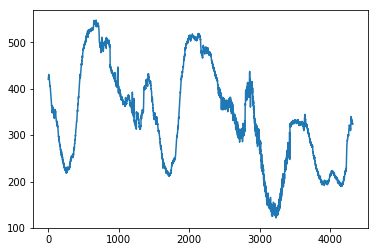

In [5]:
plt.plot(leleccum[0])

In [6]:
db2 = pywt.Wavelet('db2')

In [7]:
pywt.dwt_max_level(len(leleccum), db2)

0

In [8]:
approx, cd3, cd2, cd1 = pywt.wavedec(leleccum, db2, level=3)

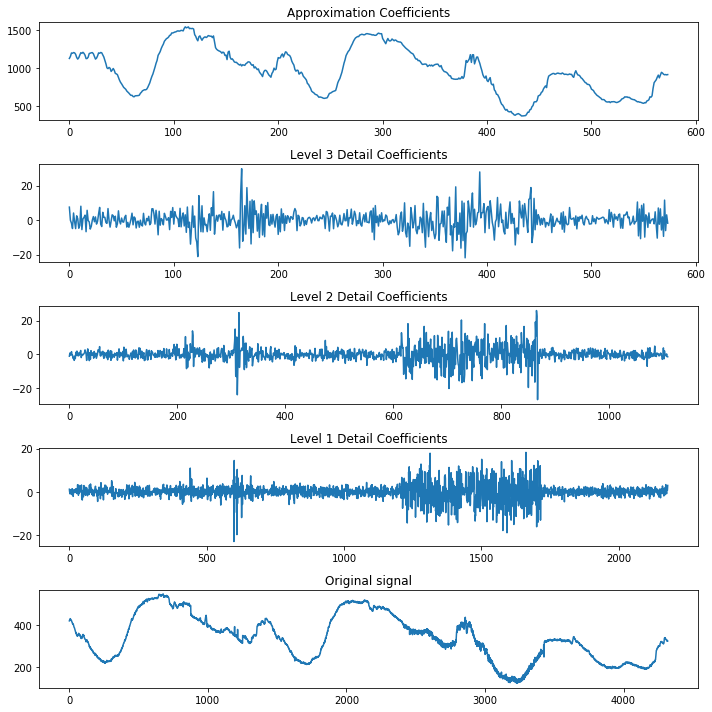

In [25]:
fig = plt.figure(figsize=(10,10))

subplot(5,1,1)
plot(approx[0])
title('Approximation Coefficients')
subplot(5,1,2)
plot(cd3[0])
title('Level 3 Detail Coefficients')
subplot(5,1,3)
plot(cd2[0])
title('Level 2 Detail Coefficients')
subplot(5,1,4)
plot(cd1[0])
title('Level 1 Detail Coefficients')
subplot(5,1,5)
plot(leleccum[0])
title('Original signal')
fig.tight_layout()

In [21]:
approx, cd3, cd2, cd1 = pywt.wavedec(leleccum, pywt.Wavelet('db20'), level=3)

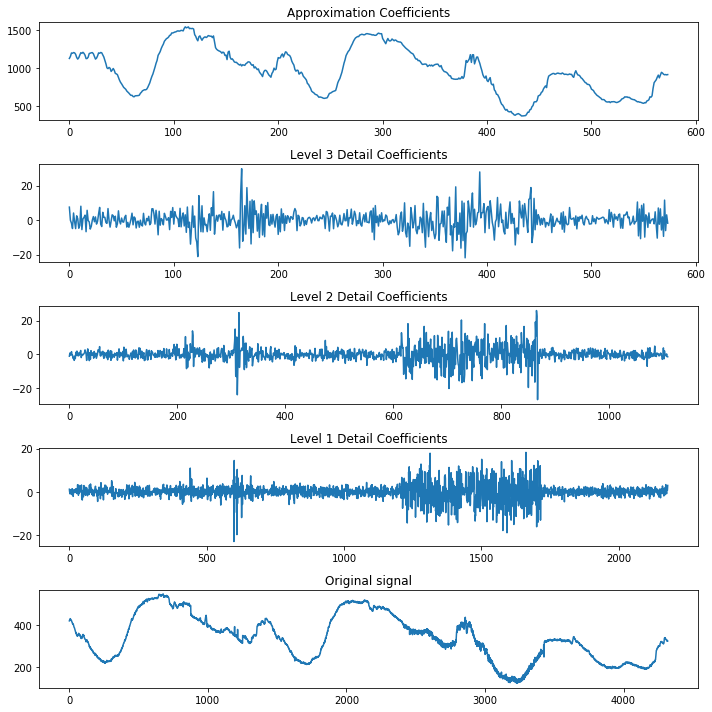

In [24]:
fig = plt.figure(figsize=(10,10))
subplot(5,1,1)
plot(approx[0])
title('Approximation Coefficients')
subplot(5,1,2)
plot(cd3[0])
title('Level 3 Detail Coefficients')
subplot(5,1,3)
plot(cd2[0])
title('Level 2 Detail Coefficients')
subplot(5,1,4)
plot(cd1[0])
title('Level 1 Detail Coefficients')
subplot(5,1,5)
plot(leleccum[0])
title('Original signal')
fig.tight_layout()

In [13]:
pywt.__version__

'1.0.0.dev0+bf7be1f'

In [14]:
 pywt.wavelist(kind='continuous') 

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

# DCT/Wavelets

In [62]:
#signal = [1,1,2,2,1,1,2,2,0,0,3,3,1,1,2,2]
signal = [0,1,2,10,2,1,0,0]

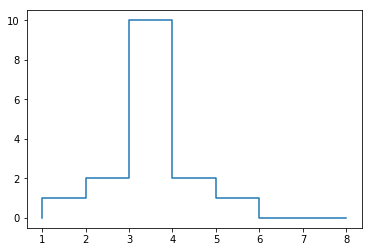

In [63]:
plt.step(range(1, len(signal)+1), signal)

In [64]:
from scipy.fftpack import dct


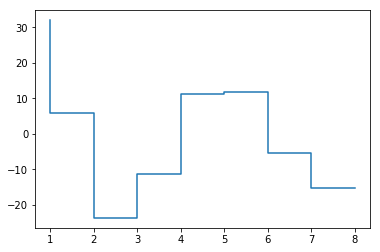

In [65]:
plt.step(range(1, len(signal)+1), dct(signal))

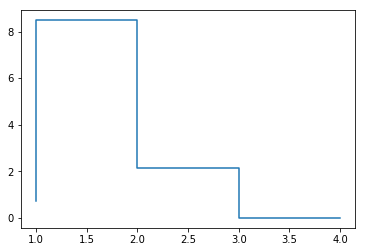

In [67]:

a1 = np.array([(signal[2*k]+signal[2*k+1])/np.sqrt(2) for k in range(0, int(np.log2(len(signal)))+1) ])
d1 = np.array([(signal[2*k]-signal[2*k+1])/np.sqrt(2) for k in range(0, int(np.log2(len(signal)))+1) ])

plt.step(range(1, len(a1)+1), a1)

In [69]:
a2 = np.array([(a1[2*k]+a1[2*k+1])/np.sqrt(2) for k in range(0, int(np.log2(len(a1)))) ])
d2 = np.array([(a1[2*k]-a1[2*k+1])/np.sqrt(2) for k in range(0, int(np.log2(len(a1)))) ])


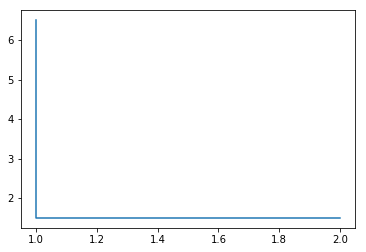

In [70]:
plt.step(range(1, len(a2)+1), a2)

In [87]:
a3 = np.array([(a2[2*k]+a2[2*k+1])/np.sqrt(2) for k in range(0, int(np.log2(len(a2)))) ])
d3 = np.array([(a2[2*k]-a2[2*k+1])/np.sqrt(2) for k in range(0, int(np.log2(len(a2)))) ])


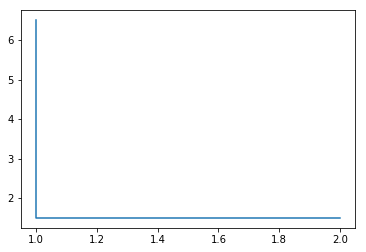

In [88]:
a2p = np.concatenate([(a3+d3)/np.sqrt(2), (a3-d3)/np.sqrt(2)])
plt.step(range(1, len(a2p)+1), a2p)

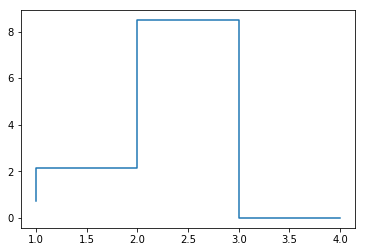

In [89]:
a1p = np.concatenate([(a2p+d2)/np.sqrt(2), (a2p-d2)/np.sqrt(2)])
plt.step(range(1, len(a1p)+1), a1p)

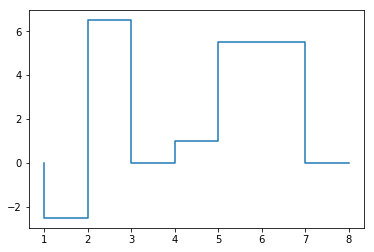

In [91]:
xp = np.concatenate([(a1p+d1)/np.sqrt(2), (a1p-d1)/np.sqrt(2)])
plt.step(range(1, len(xp)+1), xp)

In [93]:
a1p

array([  7.07106781e-01,   2.12132034e+00,   8.48528137e+00,
        -1.57009246e-16])

In [94]:
d2

array([-5.5,  1.5])

In [95]:
a2p

array([ 6.5,  1.5])

In [96]:
a1p

array([  7.07106781e-01,   2.12132034e+00,   8.48528137e+00,
        -1.57009246e-16])